## Import Dataset

In [22]:
!pip install opendatasets

In [23]:
import opendatasets as od
import pandas as pd

# Download HR dataset from Kaggle
od.download(
    "https://www.kaggle.com/datasets/manidevesh/hr-dataset-analysis")

Skipping, found downloaded files in "./hr-dataset-analysis" (use force=True to force download)


Variable  |Description |-----|-----|

**satisfaction_level**|Employee-reported job satisfaction level [0&ndash;1]|

**last_evaluation**|Score of employee's last performance review [0&ndash;1]|

**number_project**|Number of projects employee contributes to|

**average_montly_hours**|Average number of hours employee worked per month|

**time_spend_company**|How long the employee has been with the company (years)|

**Work_accident**|Whether or not the employee experienced an accident while at work|

**left**|Whether or not the employee left the company

**promotion_last_5years**|Whether or not the employee was promoted in the last 5 years|

**Department**|The employee's department|

**salary**|The employee's salary (U.S. dollars)|

In [24]:
# # Read in the downloaded dataset
file =('/content/hr-dataset-analysis/HR_DataSet.csv')
raw_dataset = pd.read_csv(file)
raw_dataset.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Explore and Clean the datset

In [25]:
# Update column names
cleaned_dataset = raw_dataset.rename(columns={'Work_accident': 'work_accident',
                         'Department': 'department',
                         'average_montly_hours': 'average_monthly_hours',
                         'time_spend_company': 'tenure'})

In [26]:
# Check observation counts and datatypes
cleaned_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   tenure                 14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [27]:
# Check for duplicates
cleaned_dataset.duplicated().sum()

3008

In [28]:
# Identify the duplicate rows based on all columns
duplicates = cleaned_dataset[cleaned_dataset.duplicated(keep=False)]

# Inspect some rows containing duplicates
sorted_duplicates = duplicates.sort_values(by=duplicates.columns.tolist())
sorted_duplicates.head(20)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
30,0.09,0.62,6,294,4,0,1,0,accounting,low
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
71,0.09,0.77,5,275,4,0,1,0,product_mng,medium
12071,0.09,0.77,5,275,4,0,1,0,product_mng,medium
14282,0.09,0.77,5,275,4,0,1,0,product_mng,medium
652,0.09,0.77,6,290,4,0,1,0,technical,medium
12652,0.09,0.77,6,290,4,0,1,0,technical,medium
14863,0.09,0.77,6,290,4,0,1,0,technical,medium
278,0.09,0.78,6,254,4,0,1,0,support,low


In [29]:
# Drop duplicates
cleaned_dataset = cleaned_dataset.drop_duplicates(keep='first')

# Compare the shape of the dataset pre and post duplicate removal
print(f'Orginal dataset shape: {raw_dataset.shape}')
print(f'Cleaned dataset shape: {cleaned_dataset.shape}')
print('\n')

Orginal dataset shape: (14999, 10)
Cleaned dataset shape: (11991, 10)




In [30]:
# Create a function to check the y variable distribution

def check_y_distribution(df, target_column):

    # Calculate the value counts for the y variable
    value_counts = df['left'].value_counts()

    # Create a DataFrame from the value counts
    value_counts_df = value_counts.reset_index()
    value_counts_df.columns = ['Value', 'Count']

    # Calculate the percentage of each value
    value_counts_df['Percentage'] = round((value_counts_df['Count'] / df.shape[0]) * 100,2)

    print(value_counts_df)

In [31]:
# Check the distribution of the 'left' column
check_y_distribution(cleaned_dataset, 'left')

   Value  Count  Percentage
0      0  10000        83.4
1      1   1991        16.6


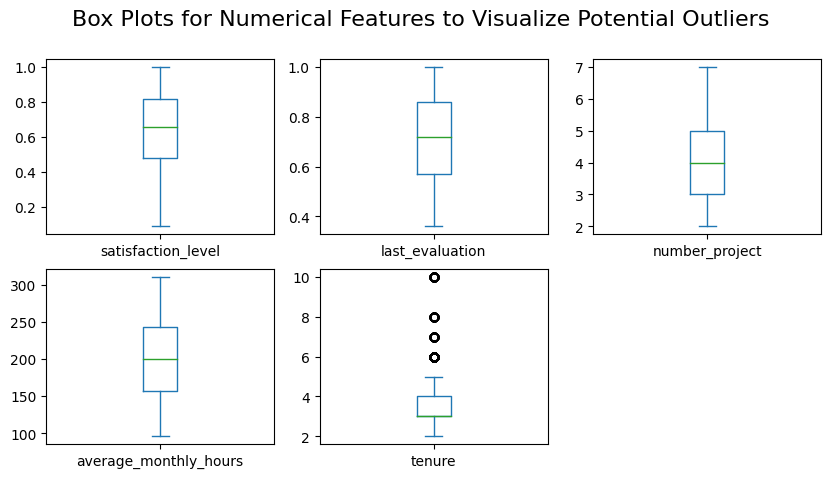

In [32]:
import matplotlib.pyplot as plt

## Check for outliers

# Gather all numeric columns
numeric_columns = cleaned_dataset.drop(['left', 'work_accident','promotion_last_5years'], axis=1, inplace=False).select_dtypes(include=['float64', 'int64']).columns

# Plot box plots
cleaned_dataset[numeric_columns].plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(10, 5),
    layout=(len(numeric_columns) // 3 + 1, 3)
)

plt.suptitle('Box Plots for Numerical Features to Visualize Potential Outliers', fontsize=16)
plt.show()

In [33]:
import numpy as np

## Inspect outlier values

# Specify the columns to check for outliers
columns_to_check = ['tenure']

# Set the Z-score threshold
threshold = 3

# Initialize a dictionary to store the results
outliers_dict = {}

# Reset the index of the cleaned_dataset
cleaned_dataset.reset_index(drop=True, inplace=True)

# Loop through each column and count the number of outliers
for column in columns_to_check:
    z_scores = np.abs((cleaned_dataset[column] - cleaned_dataset[column].mean()) / cleaned_dataset[column].std())
    outlier_indices = np.where(z_scores > threshold)[0]
    outlier_count = len(outlier_indices)
    total_rows = cleaned_dataset.shape[0]
    outlier_percentage = (outlier_count / total_rows) * 100
    print(f'The {column} column contains {outlier_count} outlier(s), which accounts for {outlier_percentage:.2f}% of all points in the dataset')

    # Save the results to the dictionary
    outliers_dict[column] = outlier_indices

Sample_value = 50

# Filter the dataframe using the dictionary
for column, indices in outliers_dict.items():
    outlier_values = cleaned_dataset.loc[indices, column]
    print(f'\nSample outlier values in the {column} column:')
    print(outlier_values.head(Sample_value))



The tenure column contains 188 outlier(s), which accounts for 1.57% of all points in the dataset

Sample outlier values in the tenure column:
10998     8
10999     8
11000     8
11001     8
11002     8
11069    10
11070     8
11071     8
11072     8
11073     8
11074     8
11115    10
11116     8
11117     8
11118     8
11119     8
11120     8
11184    10
11185    10
11186    10
11187    10
11188    10
11189    10
11190    10
11205     8
11206     8
11207     8
11208     8
11209     8
11217    10
11218    10
11220    10
11221    10
11222    10
11223    10
11249    10
11250    10
11251    10
11252    10
11253    10
11254    10
11255    10
11270     8
11271     8
11272     8
11273     8
11274     8
11282    10
11283    10
11285    10
Name: tenure, dtype: int64


In [34]:

# # Specify the columns to remove outliers from as necessary
# columns_to_remove_outliers = ['tenure']

# pre_outlier_removal = cleaned_dataset.shape

# # Loop through each column and remove outliers
# for column in columns_to_remove_outliers:
#     z_scores = np.abs((cleaned_dataset[column] - cleaned_dataset[column].mean()) / cleaned_dataset[column].std())
#     cleaned_dataset = cleaned_dataset[z_scores <= threshold]

# # Check the shape of the original and cleaned datasets
# print(f'Orginal dataset shape: {pre_outlier_removal}')
# print(f'Cleaned dataset shape: {cleaned_dataset.shape}')
# print('\n')

# # Check the distribution of the 'left' column
# check_y_distribution(cleaned_dataset, 'left')


## Exploratory Data Analysis

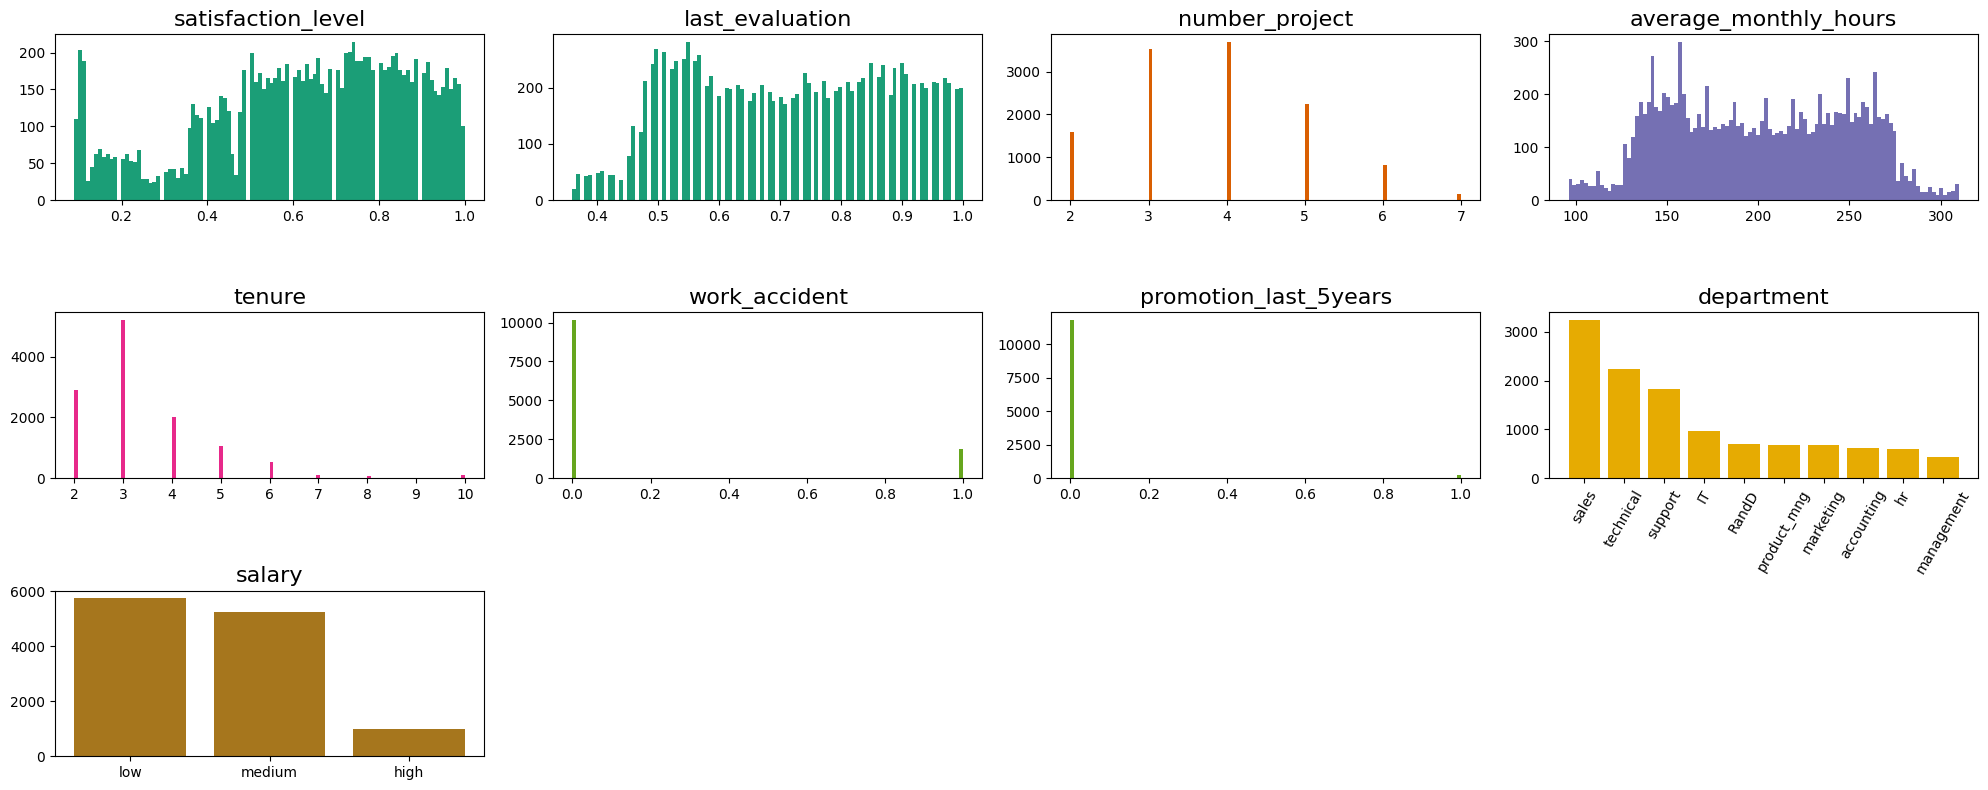

In [35]:
# Check feature distributions
fig = plt.figure(figsize = (20, 8))

# Iterate through each column in the dataset (excluding the y variable 'left')
for idx, col, t in cleaned_dataset.drop('left', axis=1).dtypes.reset_index().reset_index().values:
    color = plt.colormaps.get_cmap('Dark2')(idx / cleaned_dataset.columns.size)

    # If the column is of object type (categorical data)
    if t == 'object':
        fig.add_subplot(3, 4, idx + 1).bar(*zip(*cleaned_dataset[col].value_counts().reset_index().values), color=color)
        if cleaned_dataset[col].nunique() > 5:
            plt.xticks(rotation = 60)

    # If the column is of numerical type
    else:
        fig.add_subplot(3, 4, idx + 1).hist(cleaned_dataset[col], bins = 100, color=color)
    plt.title(col, fontsize=16)

plt.tight_layout()
plt.show()
del(idx, col, fig)

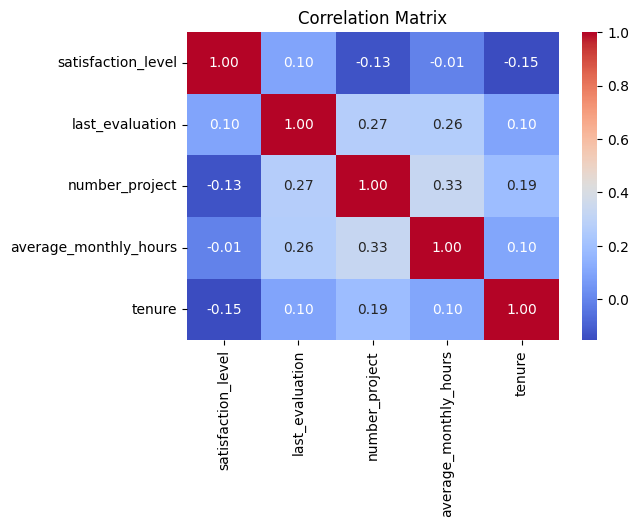

In [36]:
import seaborn as sns

# Check correlations
plt.figure(figsize=(6, 4))
sns.heatmap(cleaned_dataset[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Preprocess Data for Modelling

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Copy the cleaned dataset
preprocessed_dataset = cleaned_dataset.copy(deep=True)

# Define the categorical and numerical columns
categorical_columns = ['department']
ordinal_columns = ['salary']
numerical_columns = preprocessed_dataset.drop(['department', 'salary', 'left'], axis=1).columns

# Preprocess categorical data (one-hot encoding for department)
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocess ordinal data (label encoding for salary)
salary_mapping = {'low': 1, 'medium': 2, 'high': 3}
preprocessed_dataset['salary'] = preprocessed_dataset['salary'].map(salary_mapping)

# Scale numerical data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine preprocessing steps for the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns),
        ('ord', 'passthrough', ordinal_columns)
    ])

# Define the preprocessing pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Split features and target
X = preprocessed_dataset.drop('left', axis=1)
y = preprocessed_dataset['left']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

# Fit and transform the training data, transform the test data
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Output the shapes of the datasets to verify the preprocessing steps
print(f'Training set shape: {X_train.shape}')
print(f'Test set shape: {X_test.shape}')

# Get feature names from ColumnTransformer
def get_feature_names(column_transformer):
    feature_names = []
    for name, transformer, columns in column_transformer.transformers_:
        if name == 'remainder':
            continue
        if hasattr(transformer, 'get_feature_names_out'):
            names = transformer.get_feature_names_out(columns)
        else:
            names = columns
        feature_names.extend(names)
    return feature_names

# Retrieve and print feature names
feature_names = get_feature_names(preprocessor)
print("Feature names for X_train and X_test:", feature_names)
print("Target variable name for y_train and y_test:", y.name)

Training set shape: (9592, 18)
Test set shape: (2399, 18)
Feature names for X_train and X_test: ['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure', 'work_accident', 'promotion_last_5years', 'department_IT', 'department_RandD', 'department_accounting', 'department_hr', 'department_management', 'department_marketing', 'department_product_mng', 'department_sales', 'department_support', 'department_technical', 'salary']
Target variable name for y_train and y_test: left


## Build model

In [38]:
! pip install keras-tuner

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

# Build and compile ANN model structure for hyperparameter tuning using keras-tuner.
def model_builder(hp):
    model = Sequential()

    hp_activation = hp.Choice('activation', values=['relu', 'tanh'])
    hp_layer_1 = hp.Int('layer_1', min_value=32, max_value=512, step=32)
    hp_layer_2 = hp.Int('layer_2', min_value=32, max_value=512, step=32)
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])

    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(units=hp_layer_1, activation=hp_activation))
    model.add(Dense(units=hp_layer_2, activation=hp_activation))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                  loss=BinaryCrossentropy(),
                  metrics=['accuracy'])

    return model


In [40]:
import keras_tuner as kt
from keras_tuner import Hyperband

# Set keras tuner parameters
tuner = Hyperband(
    model_builder,
    objective='val_accuracy',
    max_epochs=100,
    factor=3,
    directory='my_dir',
    project_name='tune_keras'
)

# Create stop early parameter
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)

In [41]:
# Search for best model
tuner.search(X_train, y_train, epochs=100, validation_split=0.2,callbacks=[stop_early])

Trial 254 Complete [00h 00m 50s]
val_accuracy: 0.9603960514068604

Best val_accuracy So Far: 0.9791558384895325
Total elapsed time: 00h 29m 49s


In [42]:
# Save hyperparameters from best model
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

In [43]:
# Train model using hyperparameters from best model
model = tuner.hypermodel.build(best_hyperparameters)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2,callbacks=[stop_early])

Epoch 1/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8420 - loss: 0.3598 - val_accuracy: 0.9505 - val_loss: 0.1537
Epoch 2/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9516 - loss: 0.1592 - val_accuracy: 0.9505 - val_loss: 0.1409
Epoch 3/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9597 - loss: 0.1361 - val_accuracy: 0.9594 - val_loss: 0.1268
Epoch 4/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9603 - loss: 0.1370 - val_accuracy: 0.9635 - val_loss: 0.1262
Epoch 5/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9622 - loss: 0.1315 - val_accuracy: 0.9672 - val_loss: 0.1099
Epoch 6/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9618 - loss: 0.1253 - val_accuracy: 0.9719 - val_loss: 0.1118
Epoch 7/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9674 - loss: 0.1129 - val_accuracy: 0.9734 - val_loss: 0.1045
Epoch 8/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9698 - loss: 0.1054 - val_accu

## Evaluate Model

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9675 - loss: 0.1224
Test Accuracy: 0.9725
Test Loss: 0.1030
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


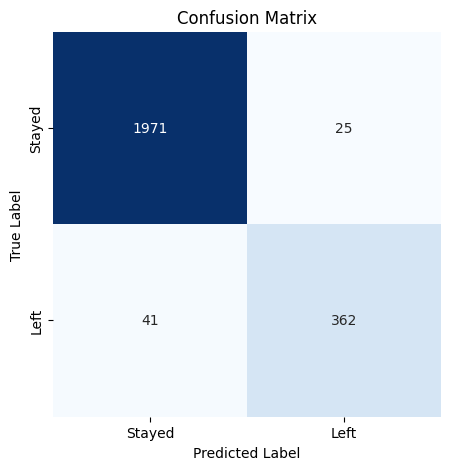


Classification Report:
              precision    recall  f1-score   support

      Stayed       0.98      0.99      0.98      1996
        Left       0.94      0.90      0.92       403

    accuracy                           0.97      2399
   macro avg       0.96      0.94      0.95      2399
weighted avg       0.97      0.97      0.97      2399



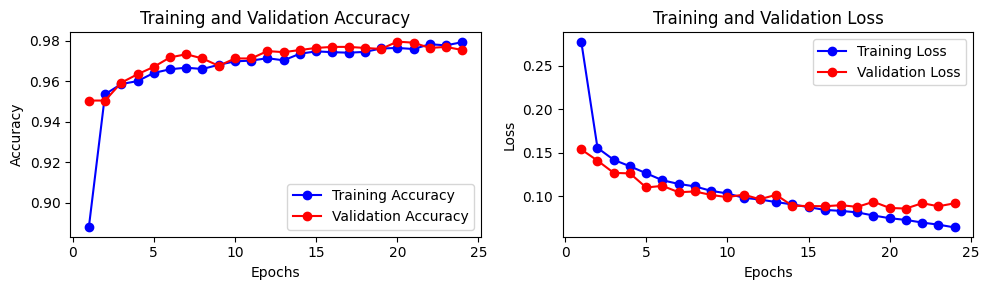

In [44]:
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Loss: {test_loss:.4f}')

# Make predictions on the test data
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Generate and plot a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Stayed', 'Left']))

# Plot the training and validation accuracy and loss at each epoch
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(10, 3))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot the training history
plot_training_history(history)
